# Assignment : 1 Neural Network from Scratch  
Name : Lucky Sharma

PRN : 202301040253

GitHub Repository Link :https://github.com/lucky-sharma02/DL_LAB/blob/main/DL_Lab_Assignment_1.ipynb

Implement a simple feedforward neural network from scratch in Python without using any in-built deep learning libraries. This implementation will focus on basic components like forward pass, backward propagation (back-propagation), and training using gradient descent.

### **Step 1:** Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


###**STEP** 2: Define Activation Function

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


###**STEP 3:** Define Feedforward Neural Network Class

In [3]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr):
        self.lr = lr
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = sigmoid(self.z2)
        return self.output

    def backward(self, X, y):
        error = y - self.output
        d_out = error * sigmoid_derivative(self.output)
        err_hidden = d_out.dot(self.W2.T)
        d_hidden = err_hidden * sigmoid_derivative(self.a1)

        self.W2 += self.a1.T.dot(d_out) * self.lr
        self.b2 += np.sum(d_out, axis=0, keepdims=True) * self.lr
        self.W1 += X.T.dot(d_hidden) * self.lr
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.lr

        return np.mean(np.square(error))

    def train(self, X, y, epochs):
        losses = []
        for i in range(epochs):
            self.forward(X)
            loss = self.backward(X, y)
            losses.append(loss)
            print(f"Epoch {i+1}  Loss: {loss}")
        return losses


###**STEP 4:** Create Datasets

In [4]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])

y_and = np.array([[0],[0],[0],[1]])
y_or  = np.array([[0],[1],[1],[1]])
y_xor = np.array([[0],[1],[1],[0]])


###**STEP 5:** Train AND Gate + Plot Graph

Training AND Gate
Epoch 1  Loss: 0.1946679327126427
Epoch 2  Loss: 0.1817886993126306
Epoch 3  Loss: 0.17426673923740124
Epoch 4  Loss: 0.1696095377193511
Epoch 5  Loss: 0.16652023853727552
Epoch 6  Loss: 0.16431825386416576
Epoch 7  Loss: 0.1626348766161343
Epoch 8  Loss: 0.1612629808534166
Epoch 9  Loss: 0.16008217206522496
Epoch 10  Loss: 0.15902034526250958
Epoch 11  Loss: 0.1580332083888598
Epoch 12  Loss: 0.15709297608964362
Epoch 13  Loss: 0.15618191664246878
Epoch 14  Loss: 0.15528855821037155
Epoch 15  Loss: 0.15440539983296553
Epoch 16  Loss: 0.15352749890149603
Epoch 17  Loss: 0.15265158253597655
Epoch 18  Loss: 0.15177547933591679
Epoch 19  Loss: 0.1508977509856011
Epoch 20  Loss: 0.1500174506988468
Epoch 21  Loss: 0.14913396335870227
Epoch 22  Loss: 0.14824689893408247
Epoch 23  Loss: 0.14735602100194534
Epoch 24  Loss: 0.14646119859752796
Epoch 25  Loss: 0.14556237367106994
Epoch 26  Loss: 0.14465953903978312
Epoch 27  Loss: 0.1437527234250311
Epoch 28  Loss: 0.1428419812

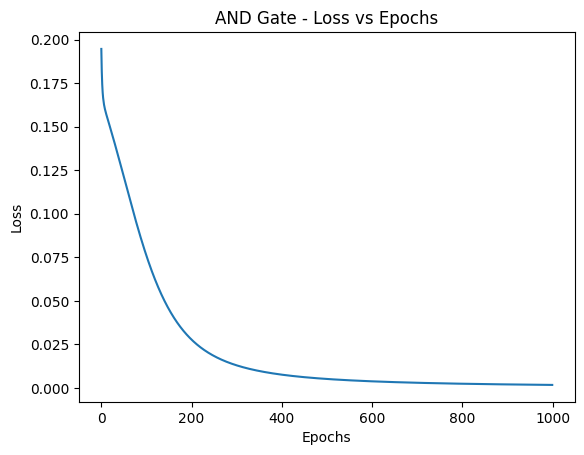

In [9]:
print("Training AND Gate")
nn_and = NeuralNetwork(2,4,1,0.5)
loss_and = nn_and.train(X, y_and, 1000)

plt.plot(loss_and)
plt.title("AND Gate - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


###**STEP 6:** Train OR Gate + Plot Graph

Training OR Gate
Epoch 1  Loss: 0.2656994688436738
Epoch 2  Loss: 0.24605796875695227
Epoch 3  Loss: 0.2333853930353153
Epoch 4  Loss: 0.2250608439196061
Epoch 5  Loss: 0.21939500217523525
Epoch 6  Loss: 0.21537574833876438
Epoch 7  Loss: 0.21240220403322116
Epoch 8  Loss: 0.210111620271074
Epoch 9  Loss: 0.20827926310266126
Epoch 10  Loss: 0.2067619734560101
Epoch 11  Loss: 0.20546608321421755
Epoch 12  Loss: 0.20432878374264848
Epoch 13  Loss: 0.20330702362431152
Epoch 14  Loss: 0.20237071491673014
Epoch 15  Loss: 0.20149846774386712
Epoch 16  Loss: 0.2006748468646897
Epoch 17  Loss: 0.19988856724708945
Epoch 18  Loss: 0.19913128259060392
Epoch 19  Loss: 0.1983967564873331
Epoch 20  Loss: 0.19768028553469916
Epoch 21  Loss: 0.19697829148360868
Epoch 22  Loss: 0.1962880287826671
Epoch 23  Loss: 0.19560737218497076
Epoch 24  Loss: 0.19493466074581176
Epoch 25  Loss: 0.19426858209928233
Epoch 26  Loss: 0.19360808588242337
Epoch 27  Loss: 0.19295231850721473
Epoch 28  Loss: 0.19230057374

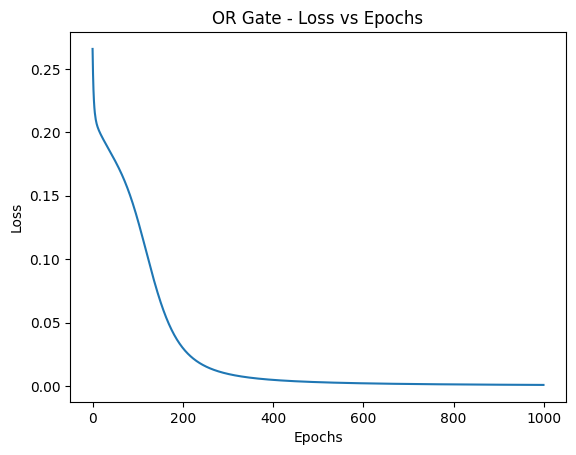

In [11]:
print("Training OR Gate")
nn_or = NeuralNetwork(2,4,1,0.5)
loss_or = nn_or.train(X, y_or, 1000)

plt.plot(loss_or)
plt.title("OR Gate - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


###**STEP 7:** Train XOR Gate + Plot Graph

Training XOR Gate
Epoch 1  Loss: 0.34249560924825206
Epoch 2  Loss: 0.3174069930221024
Epoch 3  Loss: 0.294608623548599
Epoch 4  Loss: 0.2773760453186388
Epoch 5  Loss: 0.26655569966627507
Epoch 6  Loss: 0.2606388653951408
Epoch 7  Loss: 0.25759900263638386
Epoch 8  Loss: 0.2560082183273488
Epoch 9  Loss: 0.2550942250542746
Epoch 10  Loss: 0.2544866147319358
Epoch 11  Loss: 0.25401681354881417
Epoch 12  Loss: 0.25360973204903287
Epoch 13  Loss: 0.25323216687298594
Epoch 14  Loss: 0.2528694352672859
Epoch 15  Loss: 0.25251500358245726
Epoch 16  Loss: 0.25216591878062283
Epoch 17  Loss: 0.25182080155571723
Epoch 18  Loss: 0.25147896541986897
Epoch 19  Loss: 0.25114003003987795
Epoch 20  Loss: 0.2508037514668118
Epoch 21  Loss: 0.25046994755250507
Epoch 22  Loss: 0.2501384651470686
Epoch 23  Loss: 0.24980916563862243
Epoch 24  Loss: 0.24948191854669105
Epoch 25  Loss: 0.2491565986524479
Epoch 26  Loss: 0.24883308468269222
Epoch 27  Loss: 0.2485112586768412
Epoch 28  Loss: 0.24819100565465

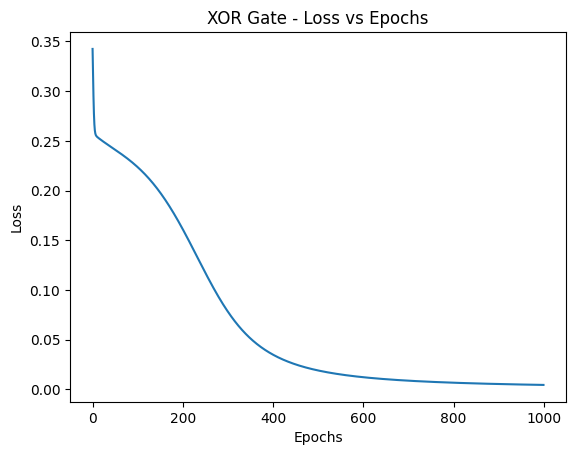

In [13]:
print("Training XOR Gate")
nn_xor = NeuralNetwork(2,4,1,0.5)
loss_xor = nn_xor.train(X, y_xor, 1000)

plt.plot(loss_xor)
plt.title("XOR Gate - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


###**STEP 8:** Testing Phase

In [14]:
print("\n--- Testing Phase ---")

a = float(input("Enter first input: "))
b = float(input("Enter second input: "))

test_input = np.array([[a, b]])

print("\nAND Gate Output :", nn_and.forward(test_input))
print("OR  Gate Output :", nn_or.forward(test_input))
print("XOR Gate Output:", nn_xor.forward(test_input))



--- Testing Phase ---
Enter first input: 0
Enter second input: 1

AND Gate Output : [[0.03904368]]
OR  Gate Output : [[0.96843987]]
XOR Gate Output: [[0.93094941]]


## Applications

Feedforward Neural Networks trained using the Backpropagation algorithm are widely used in many real-world problems because of their ability to learn complex patterns from data.

Some important applications are:

1. **Pattern Recognition**  
   Used in recognizing handwritten digits, characters, and symbols.

2. **Image Classification**
   Used to identify objects in images such as faces, vehicles, and animals.

3. **Speech and Voice Recognition**  
   Used in virtual assistants like Siri, Alexa, and Google Assistant.

4. **Medical Diagnosis**  
   Helps in detecting diseases such as cancer, diabetes, and heart problems based on patient data.

5. **Spam Email Detection**  
   Classifies emails as spam or not spam.

6. **Financial Forecasting**  
   Used for stock price prediction and risk analysis.

7. **Fault Detection in Systems**  
   Detects abnormal behavior in machines and industrial equipment.

8. **Logic Gate Simulation**  
   Used in education to demonstrate AND, OR, XOR, and other logical operations.


## Conclusion

Feedforward Neural Network was implemented from scratch and trained using the Backpropagation algorithm. The network was able to learn AND, OR, and XOR logic gate operations successfully.

The decreasing loss values and correct predictions during testing show that the model learns effectively. This experiment demonstrates how feedforward neural networks can be used for solving basic supervised learning problems.
